In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns


In [30]:
df =pd.read_csv("../data/cleaned_data123.csv")

In [31]:
df_clustering = df.select_dtypes(include=['int64', 'float64'])

In [32]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df_clustering)

In [33]:
KMeans = KMeans(n_clusters=3, random_state=42)
KMeans.fit(x_scaled)
clusters = KMeans.labels_
df['cluster'] = clusters

In [34]:
score = silhouette_score(x_scaled, clusters)
print(f"silhouette Score: {score:.3f}")

silhouette Score: 0.050


In [35]:
# for k in range(2, 10):
#     model = KMeans(n_clusters=k, random_state=42)
#     model.fit(x_scaled)
#     score = silhouette_score(x_scaled, model.labels_)
#     print(f"k={k}, Silhouette Score: {score:.3f}")
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for k in range(2, 11):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(x_scaled)
    labels = model.labels_
    score = silhouette_score(x_scaled, labels)
    print(f"k={k}  Silhouette Score = {score:.3f}")

k=2  Silhouette Score = 0.052
k=3  Silhouette Score = 0.050
k=4  Silhouette Score = 0.048
k=5  Silhouette Score = 0.048
k=6  Silhouette Score = 0.047
k=7  Silhouette Score = 0.045
k=8  Silhouette Score = 0.047
k=9  Silhouette Score = 0.047
k=10  Silhouette Score = 0.048


In [36]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(x_scaled)

# Check how many clusters (excluding noise)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters found by DBSCAN:", n_clusters)

# Silhouette Score (only if >1 cluster found)
if n_clusters > 1:
    score = silhouette_score(x_scaled, labels)
    print(f"Silhouette Score (DBSCAN): {score:.3f}")
else:
    print("Not enough clusters to compute silhouette score.")


Number of clusters found by DBSCAN: 0
Not enough clusters to compute silhouette score.


In [37]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

for k in range(2, 11):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(x_pca)
    labels = model.labels_
    score = silhouette_score(x_pca, labels)
    print(f"k={k} → Silhouette Score (PCA): {score:.3f}")
print(pca.explained_variance_ratio_)

k=2 → Silhouette Score (PCA): 0.309
k=3 → Silhouette Score (PCA): 0.336
k=4 → Silhouette Score (PCA): 0.313
k=5 → Silhouette Score (PCA): 0.302
k=6 → Silhouette Score (PCA): 0.323
k=7 → Silhouette Score (PCA): 0.319
k=8 → Silhouette Score (PCA): 0.307
k=9 → Silhouette Score (PCA): 0.310
k=10 → Silhouette Score (PCA): 0.318
[0.07778258 0.07602195]


In [1]:
import matplotlib.pyplot as plt

pca_2d = PCA(n_components=2)
x_pca_2d = pca_2d.fit_transform(x_scaled)

plt.scatter(x_pca_2d[:, 0], x_pca_2d[:, 1], c=labels, cmap='viridis')
plt.title("Student Clusters (Visualized in 2D PCA Space)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Cluster")
plt.show()


NameError: name 'PCA' is not defined

In [46]:
#dbscan #2
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(x_scaled)

# Check how many clusters (excluding noise)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters found by DBSCAN:", n_clusters)

# Silhouette Score (only if >1 cluster found)
if n_clusters > 1:
    score = silhouette_score(x_scaled, labels)
    print(f"Silhouette Score (DBSCAN): {score:.3f}")
else:
    print("Not enough clusters to compute silhouette score.")

Number of clusters found by DBSCAN: 0
Not enough clusters to compute silhouette score.


In [39]:
# ✅ Step 1: Add the cluster labels to your original DataFrame
df['Cluster'] = labels

# ✅ Step 2: See what defines each cluster
print(df.groupby('Cluster').mean(numeric_only=True))

# ✅ Step 3 (Optional): Compare to grades (if you have a 'Final_Grade' column)
if 'Final_Grade' in df.columns:
    print(pd.crosstab(df['Cluster'], df['Final_Grade']))

         Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  \
Cluster                                                                         
0            17.740964   88.295181              2.315261             1.841365   
1            22.520525   71.410509              2.142857             2.068966   
2            20.455314   78.159420              2.000000             2.264493   
3            19.551339   81.613839              2.622768             1.529018   
4            21.183824   71.593137              2.585784             1.666667   
5            21.567686   73.737991              1.626638             2.495633   
6            18.016000   90.098667              1.706667             2.392000   
7            20.150327   78.476035              2.318083             1.927015   
8            18.692403   84.449564              2.007472             2.136986   
9            19.677193   83.775439              1.543860             2.577193   

         Sleep_Hours  Previ

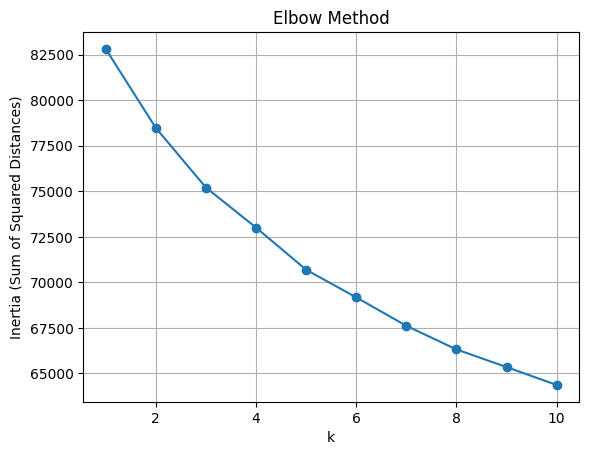

In [40]:
inertias = []
for k in range(1, 11):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(x_scaled)
    inertias.append(model.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('k')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method')
plt.grid(True)
plt.show()
